# Task 1 - Calculating the square root of 2

***

[4]*The square root of 2 or root 2 is represented using the square root symbol √ and written as √2 whose value is 1.414. This value is widely used in mathematics. Root 2 is an irrational number as it cannot be expressed as a fraction and has an infinite number of decimals. So, the exact value of the root of 2 cannot be determined.*

## Newton's Method:
[2]
![Newton's Method](./images/newtons_method.png)

Newton's Method of calculating square roots is an iterative root-finding algorithm, that produces successively better approximations of the root. Where ${\alpha}_{0} $ is an initial approximation of $\sqrt{N}$. If the initial approximation is suitably chosen, the process converges quickly and accurate approximations to $\sqrt{N}$ are obtained after only a few iterations. However, if extended multiple-precision approximations to $\sqrt{N}$ are sought, the computation time increases rapidly because of the times required for dividing ${N}$ by a many-digit number. Generally, the time required for floating-point division on modern electronic computers compared to floating-point multiplication is at least twice as much for double precision computations.

![Iterational Accuracy](./images/iterations.png)

This is an example of the algorithm each time it runs. Where ${\alpha}_{0}=1$, ${\alpha}_{1}=1.5$, and so on for 5 iterations until it is accurate to 100 decimal places (python can only display 52).

### References
[1] The square root of 2; Ian McLoughlin; https://web.microsoftstream.com/video/214c8379-7c67-45b5-910d-39ec5d269223<br/>
[2] The square root of 2 to 1 million decimals; Jacques Dutka; https://www.jstor.org/stable/2004359?seq=1&cid=pdf-reference<br/>
[3] Methods of Computing Square Roots; Wikipedia; https://en.wikipedia.org/wiki/Methods_of_computing_square_roots
[4] Square Root of 2; Byju's Classes; https://byjus.com/maths/square-root-of-2/

In [1]:
def sqrt2(N):
    
    # Initial estimation of the square root. In this case 2 / 2 = 1. Actual root is 1.414
    a = N / 2.0
    
    # Precision variable, 1e-6 gave a result accurate to 100 decimals.
    precision = 0.000001

    # If the difference between N and a^2 is greater than 0.000001, continue the loop.
    while abs(N - (a*a)) > precision: 
        a = (a + (N/a)) / 2.0 # Gives a more accurate estimation than the initial estimate each time it is iterated.
        
    return a

ans = sqrt2(2)

# Multiply answer by a googol to convert it to an integer, as you can only format floats to 52 decimals in python.
ans = ans * (10**100)

# Convert to a string and insert decimal place.
s = str(int(ans))
ans = s[:1] + '.' + s[1:]

In [2]:
print("The Square Root of 2 to 100 decimals =\n %s" % ans)

The Square Root of 2 to 100 decimals =
 1.4142135623746899583029298868490835765746669908143409641927621954070784222600499434409744805268553728


***

## End of Task 1

# Task 2 - Pearson's chi-squared test

A statistical hypothesis test that is used to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table. The formula below is used to calculate the difference between the observed and expected in a table of values.

$\chi^2 = \mathbf{N} \sum \limits _{i=1} ^n \frac{(O _i / \mathbf{N} - p _i)^2}{p _i}$

Where:

$\chi^2$ = Pearson's cumulative test statistic.<br>
$O _i$ = the number of observations of type i.<br>
$\mathbf{N}$ = total number of observations.<br>
$E_i = N_p{_i}$ = the expected (theoretical) count of type i, asserted by the null hypothesis that the fraction of type i in the population is $p_i$<br>
$n$ = the number of cells in the table

The chi-squared statistic can then be used to calculate a p-value by comparing the value of the statistic to a chi-squared distribution. The number of degrees of freedom is equal to the number of cells $n$, minus the reduction in degrees of freedom, $p$.

Applied to this table of values:

![Table](./images/table_of_values.png)

We obtain a chi-squared value of **24.5712028585826**<br>
And a $p$ value of **0.0004098425861096696**

### References:
[1] Chi-squared test; Wikipedia;
https://en.wikipedia.org/wiki/Chi-squared_test<br>
[2] Pearson's Chi-squared test; Wikipedia;
https://en.wikipedia.org/wiki/Pearson's_chi-squared_test<br>
[3] Chi-Square Procedures for the Analysis of Categorical Frequency Data; Richard Lowry; https://web.archive.org/web/20171022032306/http://vassarstats.net:80/textbook/ch8pt1.html <br>

Chi-Square value of array = 24.57120285858259833844
p-value = 0.00040984258610966958


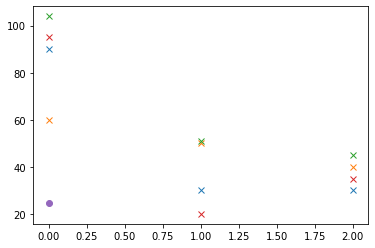

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy import stats

obs = np.array([[90, 60, 104, 95], [30, 50, 51, 20], [30, 40, 45, 35]])
g, p, dof, expctd = chi2_contingency(obs, lambda_="pearson")

plt.plot(obs, 'x', g, 'o')

# Chi-square and p-value.
print("Chi-Square value of array = %2.20f\np-value = %0.20f" % (g, p))

***

## End of Task 2

# TASK 3 - Research of STDEV.P vs STDEV.S

### Brief:
*The standard deviation of an array of numbers x is
calculated using numpy as **np.sqrt(np.sum((x - np.mean(x))^2)/len(x))** .
However, Microsoft Excel has **two different versions** of the standard deviation
calculation, **STDEV.P and STDEV.S** . The STDEV.P function performs the above
calculation but in the STDEV.S calculation **the division is by len(x)-1** rather
than **len(x)**. Research these Excel functions, writing a note in a Markdown cell
about the difference between them. Then use numpy to perform a simulation
demonstrating that the STDEV.S calculation is a better estimate for the standard
deviation of a population when performed on a sample. Note that part of this task
is to figure out the terminology in the previous sentence.*

## Differences between STDEV.P & STDEV.S

### STDEV.P:
STDEV.P is an excel function used when calculating the standard deviation of an entire population. A population data set contains all members of a specified group, this is the entire list of possible data values. Uses the count of **n** in formulae.

For example, the population may be "ALL people living in the US."

### STDEV.S:
STDEV.S is an excel function used when calculating a sample of a data set. A sample data set contains a part, or a subset, of a population. The size of a sample is always less than the size of the population from which it is taken. This utilizes the count of **n-1** in formulae

Example: The sample may be "SOME people living in the US."

### Differences:
The only difference between the formulae is that for the sample standard deviation you divide by n-1, n is subtracted by 1 to get an unbiased sample deviation. Subtracting by 1 means that the sample standard deviation will be a **larger** number.

See the example below to understand why n-1 is a better estimate for a sample variance.


In [4]:
import numpy as np
import random

# Create dataset of 100 random integers between 1 and 20.
x = []
n = 100
numLow = 1
numHigh = 20

for i in range (0, n):
    x.append(random.randint(numLow, numHigh))
x.sort()

# Calculating the population standard deviation.
stdevp = np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
print("Entire population with STDEV.P = %1.15f" % stdevp)

# Create a sample set of x, using 50% of the data that is in x.
y = x[1:10] + x[30:40] + x[60:70] + x[90:100]

# Calculating the un-biased sample standard deviation.
stdevs_unbiased = np.sqrt(np.sum((y - np.mean(y))**2)/len(y)-1)
print("Sample population with unbiased STDEV.S = %1.15f" % stdevs_unbiased)

# Calculating the biased sample standard deviation.
stdevs_biased = np.sqrt(np.sum((y - np.mean(y))**2)/len(y))
print("Sample population with biased STDEV.S = %1.15f" % stdevs_biased)

Entire population with STDEV.P = 5.747173218200405
Sample population with unbiased STDEV.S = 6.381010206523164
Sample population with biased STDEV.S = 6.458892417106263


### Results:

As we can see from the results, the unbiased formula is generally a decimal or two closer to the population standard deviation than the biased formula.

### References:
* Population VS Sample Data; MathBitsNotebook.com; http://mathbitsnotebook.com/Algebra1/StatisticsData/STPopSample.html
* Measures of Spread; MathBitsNotebook.com; http://mathbitsnotebook.com/Algebra1/StatisticsData/STSpread.html
* Why we divide by n-1 for unbiased sample variance; Sal Khan; https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/review-and-intuition-why-we-divide-by-n-1-for-the-unbiased-sample-variance

***

## End of Task 3

***
# Task 4 - Machine Learning
## K-means clustering on the Iris Data Set

Clustering is an unsupervisedlearning method that allows us to group set of objects based on similar characteristics. In general, it can help you find meaningful structure among your data, group similar data together and discover underlying patterns.

One of the most common clustering methods is K-means algorithm. The goal of this algorithm isto partition the data into set such that the total sum of squared distances from each point to the mean point of the cluster is minimized.
K means works through the following iterative process:

* Pick a value for k (the number of clusters to create)
* Initialize k ‘centroids’ (starting points) in your data
* Create your clusters. Assign each point to the nearest centroid.
* Make your clusters better. Move each centroid to the center of its cluster.
* Repeat steps 3–4 until your centroids converge.

In [5]:
# Imports the Iris data set from sklearn.
from sklearn import datasets

# Imports for plotting and plot legend.
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Machine learning algorithm used to create clusters.
import sklearn.cluster as skcl

In [6]:
# Load the data set.
iris = datasets.load_iris()

In [7]:
# Seperate data into X and Y values ( Sepal Length & Width )
X = iris.data[:, :2]
y = iris.target

Text(0, 0.5, 'Sepal Width')

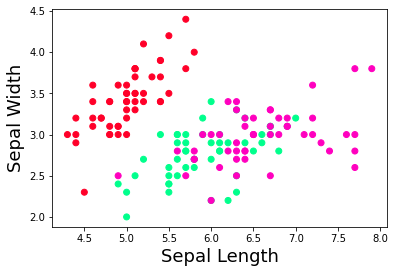

In [8]:
# Plot data without clustering
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [9]:
# Create model using parameters for the number of clusters ( this generates the same number of centroids ) and a random state
# Random state determines random number generation for centroid initialization. Makes the randomness deterministic.
km = skcl.KMeans(n_clusters = 3, random_state=21)
km.fit(X)

KMeans(n_clusters=3, random_state=21)

In [18]:
# The centers of each cluster.
centers = km.cluster_centers_
print(centers)

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


In [38]:
# Making a prediction from imaginary flowers measured
new_flowers = np.array([[4.5, 3.6], [5.8, 2.3], [7.2, 4.2]])
predictions = km.predict(new_flowers)
predictions
print(new_flowers[:,1])

[3.6 2.3 4.2]


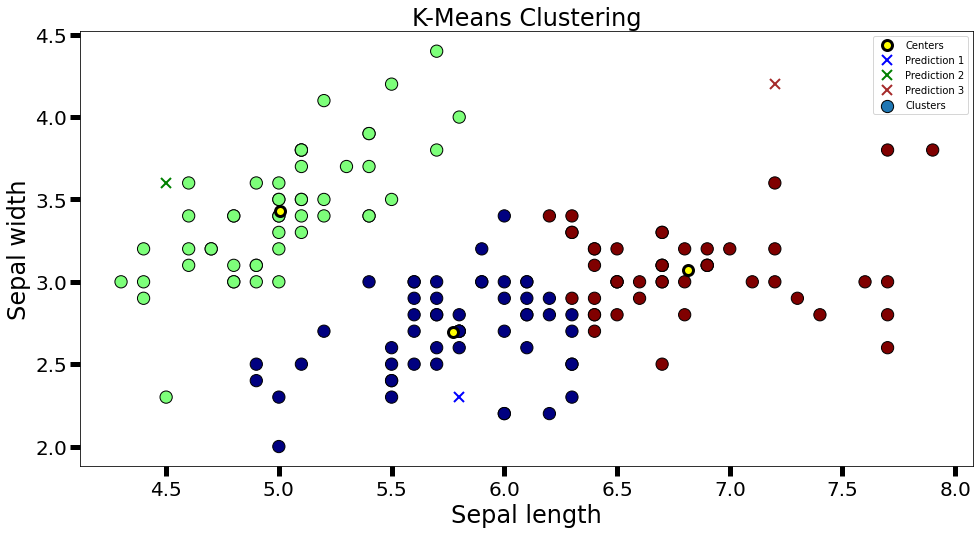

In [70]:
# Tells us which cluster that each data point belongs to.
new_labels = km.labels_

# Plot the identified clusters
fig, axes = plt.subplots(figsize=(16,8))
axes.scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet', edgecolor='k', s=150, label="Clusters")
axes.plot(centers[:, 0], centers[:, 1], marker='o', markeredgewidth=3, markersize=10, linestyle = 'None', markerfacecolor='yellow', markeredgecolor='black', label="Centers")
axes.plot(new_flowers[predictions == 0][:,0], new_flowers[predictions == 0][:,1], marker='x', markeredgewidth=2, markeredgecolor='blue', markersize=10, label="Prediction 1", linestyle = 'None')
axes.plot(new_flowers[predictions == 1][:,0], new_flowers[predictions == 1][:,1], marker='x', markeredgewidth=2, markeredgecolor='green', markersize=10, label="Prediction 2", linestyle = 'None')
axes.plot(new_flowers[predictions == 2][:,0], new_flowers[predictions == 2][:,1], marker='x', markeredgewidth=2, markeredgecolor='brown', markersize=10, label="Prediction 3", linestyle = 'None')
axes.set_xlabel('Sepal length', fontsize=24)
axes.set_ylabel('Sepal width', fontsize=24)
axes.tick_params(direction='out', length=10, width=5, colors='k', labelsize=20)
axes.set_title('K-Means Clustering', fontsize=24)
green_patch = mpatches.Patch(color='lightgreen', label='Cluster 1')
blue_patch = mpatches.Patch(color='blue', label='Cluster 2')
brown_patch = mpatches.Patch(color='brown', label='Cluster 3')
yellow_patch = mpatches.Patch(color='yellow', label='Centroids')
axes.legend()

### Results

* As we can see from the plot, the data has been seperated into 3 clusters, green, blue and brown.

* The centroids of each cluster have also been included (yellow dots)

* The prediction points are in their respective group colours depending on what group they're in, contained in the predictions array.

* The group is predicted from which centroid the point is nearest to.

### References
* Clustering with Iris data set; Belen Sanches; https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee
* Kmeans Clustering; Scikit-learn; https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html